In [1]:
# Membuat pengecekan tensorflow
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

assert LooseVersion(tf.__version__) >= LooseVersion('1.0')
print("TensorFlow Version: {}".format(tf.__version__))

if not tf.test.gpu_device_name():
    warnings.warn("No GPU Found: Please ensure you have installed TensorFlow corrently")
else:
    print("Default GPU Device: {}".format(tf.test.gpu_device_name()))

TensorFlow Version: 2.3.1
Default GPU Device: /device:GPU:0


# Import Libraries

In [2]:
# Arsitektur CNN
from tensorflow.keras import layers, models, callbacks

# Generator dan Praproses Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Fungsi Loss
from keras.metrics import sparse_categorical_crossentropy

# Visualisasi
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Pengaturan Direktori
import os

# Log
import pandas as pd

Using TensorFlow backend.


# Pra-pelatihan

In [3]:
# Membuat nama kelas berdasarkan urutan folder
class_names = [ 'ain', 'alif', 'ba', 'dal', 'dhod', 'dzal',
                'dzho', 'fa', 'ghoin', 'ha', 'ha\'', 'hamzah', 'jim',
                'kaf', 'kho', 'lam', 'lamalif', 'mim', 'nun', 'qof',
                'ro', 'shod', 'sin', 'syin', 'ta', 'tho', 'tsa', 
                'wawu', 'ya', 'zain']

## Arsitektur CNN

![arsitektur](arsitektur_baru.png)

In [4]:
# Membuat arsitektur CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2), padding='valid'))
model.add(layers.Conv2D(64, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2), padding='valid'))
model.add(layers.Conv2D(128, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2), padding='valid'))
model.add(layers.Conv2D(256, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2), padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(30, activation='softmax'))

# Melihat detail arsitektur
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

## Dataset | Praproses dan Augmentasi

In [5]:
# Pengaturan direktori
PATH = 'dataset'
VAL_DATA = 'test_mixed'
TOTAL_TRAIN_DATA=1680
TRAIN_DIR = os.path.join(PATH, 'train')
VALIDATION_DIR = os.path.join(PATH, VAL_DATA)

BATCH_SIZE = 56
IMG_SIZE = (150, 150)

# Membuat generator pelatihan
gen = ImageDataGenerator( 
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      shear_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'

)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse',
                                                    target_size=IMG_SIZE,
                                                    color_mode='rgb'
                                                   )

validation_datagen = ImageDataGenerator( rescale = 1./255 )

# Membuat generator validasi
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse',
                                                    target_size=IMG_SIZE,
                                                    color_mode='rgb'
                                                    )

Found 1680 images belonging to 30 classes.
Found 420 images belonging to 30 classes.


![Augmentasi Data](augmentasi.png)

## Pelatihan

In [7]:
# Callback untuk menyimpan model setiap epoch
model_save_callback = callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}_{accuracy:.3f}.h5', save_best_only=False, save_weights_only=False, monitor='val_accuracy')

# Inisialisasi metrik
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Pelatihan!
history = model.fit( train_generator,
                     steps_per_epoch=train_generator.n // train_generator.batch_size,
                     epochs=105, 
                     validation_data=validation_generator,
                     validation_steps= validation_generator.n // validation_generator.batch_size,
                     callbacks=[
                         model_save_callback
                     ]
                   ) 

Epoch 1/105
30/30 [==============================] - 20s 673ms/step - loss: 3.4043 - accuracy: 0.0292 - val_loss: 3.3587 - val_accuracy: 0.0510
Epoch 2/105
30/30 [==============================] - 21s 703ms/step - loss: 3.2761 - accuracy: 0.0673 - val_loss: 2.8680 - val_accuracy: 0.1811
Epoch 3/105
30/30 [==============================] - 24s 799ms/step - loss: 3.1391 - accuracy: 0.1113 - val_loss: 2.6539 - val_accuracy: 0.2321
Epoch 4/105
30/30 [==============================] - 22s 727ms/step - loss: 2.9396 - accuracy: 0.1393 - val_loss: 2.4919 - val_accuracy: 0.2474
Epoch 5/105
30/30 [==============================] - 23s 775ms/step - loss: 2.7683 - accuracy: 0.1881 - val_loss: 2.3434 - val_accuracy: 0.2526
Epoch 6/105
30/30 [==============================] - 22s 719ms/step - loss: 2.6239 - accuracy: 0.2024 - val_loss: 2.4788 - val_accuracy: 0.2092
Epoch 7/105
30/30 [==============================] - 22s 748ms/step - loss: 2.4177 - accuracy: 0.2286 - val_loss: 2.2599 - val_accuracy:

## Visualisasi metrik

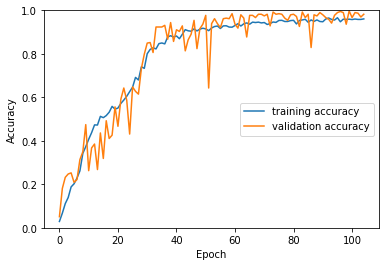

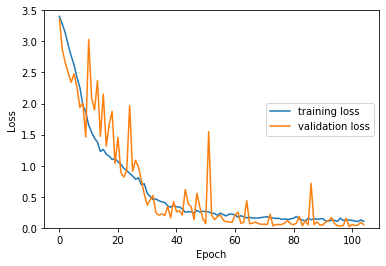

In [8]:
# Menyimpan history pelatihan
pd.DataFrame(history.history).to_csv('history.csv')

# Memvisualisasikan metrik akurasi selama pelatihan 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0., 1]) 
plt.legend(loc='right')
plt.savefig('train_val_acc_augmentation.png')
plt.show()

# Memvisualisasikan metrik loss selama pelatihan
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0., 3.5])
plt.legend(loc='right')
plt.savefig('train_val_loss_augmentation.png')
plt.show()

# Evaluasi Model 

In [18]:
# load model terbaik
loaded_model = models.load_model('models/hijaiyah.h5')

In [15]:
# Membuat fungsi load image untuk pengujian
def load_image(img_path):
  # Praproses data uji
  img = load_img(img_path, target_size=(150,150,3))
  img_tensor = img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.0

  return img_tensor

In [20]:
# Membuat generator seperti sebelum pelatihan untuk data uji
PATH = 'dataset'
VAL_DATA = 'test_mixed'
VALIDATION_DIR = os.path.join(PATH, VAL_DATA)

BATCH_SIZE = 56
IMG_SIZE = (150, 150)


validation_datagen = ImageDataGenerator( rescale = 1./255 )

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse',
                                                    target_size=IMG_SIZE,
                                                    color_mode='rgb'
                                                    )

Found 420 images belonging to 30 classes.


## Pengujian manual

Nama huruf: ain
0


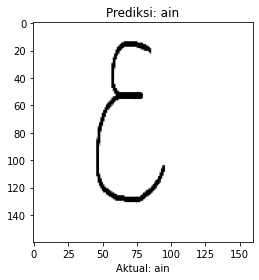

[[9.9066544e+01 4.0638943e-24 6.3415554e-13 3.6052155e-12 5.5199848e-07
  1.5067507e-14 1.3533723e-12 1.4415460e-07 7.1841455e-01 1.2056939e-06
  1.9632159e-01 2.4668273e-06 3.8811008e-06 5.0914638e-13 1.3287460e-04
  1.2214653e-15 1.9853645e-09 2.6024156e-09 9.1671869e-15 9.2420308e-11
  2.7004867e-15 1.8361215e-02 8.0551877e-07 4.0370742e-15 1.5712895e-17
  2.3216688e-07 9.6827398e-22 1.3214772e-04 8.3870131e-05 1.5078484e-22]]


In [21]:
# load data uji
huruf = input("Nama huruf: ")
img_path = 'dataset/' + VAL_DATA + '/' + huruf + '/'+ huruf + '_5.jpg'
new_image = load_image(img_path)

# prediksi
pred = loaded_model.predict(new_image)
pred *= 100
print(np.argmax(pred))

img = load_img(img_path, target_size=(160, 160))
plt.imshow(img)
plt.title("Prediksi: {}".format(class_names[np.argmax(pred)]))
plt.xlabel("Aktual: " + img_path.split("/")[2])
plt.tight_layout()
plt.show()
print(pred)

In [35]:
# Pengujian GUI

from ipywidgets import *
from IPython.display import clear_output, display
from tkinter import Tk, filedialog

def select_files(file):
    clear_output()
    root = Tk()
    root.withdraw() # Hide the main window.
    root.call('wm', 'attributes', '.', '-topmost', True) # Raise the root to the top of all windows.
    file.files = filedialog.askopenfilename(multiple=True) # List of selected files will be set button's file attribute.
    print(file.files) # Print the list of files selected.

In [41]:
fileselect = Button(description="File select")
fileselect.on_click(select_files)

display(fileselect)

('H:/Ngoding Python/Skripsi/Hijaiyah Deployment CNN/dataset/test_mixed/ain/ain_2.jpg',)


0


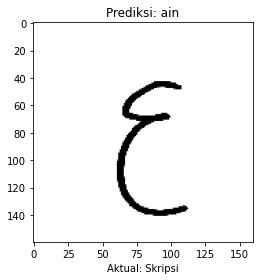

[[9.9989906e+01 1.3855977e-21 2.5522734e-18 4.1006083e-12 8.1949654e-16
  7.4127910e-19 8.8806365e-15 1.7906005e-15 8.8522956e-03 3.5717522e-09
  1.0736453e-03 1.7444733e-04 5.7614985e-10 2.5186303e-14 8.0932455e-10
  1.4593145e-19 3.7247591e-10 7.2022268e-09 2.0979016e-22 3.0006535e-19
  9.7600058e-18 7.5776700e-09 3.7494465e-12 4.9234932e-22 5.4810099e-26
  1.0877632e-06 7.6321688e-31 6.6209097e-08 1.6079262e-09 1.2132027e-25]]


In [43]:
# Don't run this cell if the cell above hadn't run yet

files = fileselect.files
img_path = files[0]
new_image = load_image(img_path)

# prediksi
pred = loaded_model.predict(new_image)
pred *= 100
print(np.argmax(pred))

img = load_img(img_path, target_size=(160, 160))
plt.imshow(img)
plt.title("Prediksi: {}".format(class_names[np.argmax(pred)]))
plt.xlabel("Aktual: " + img_path.split("/")[2])
plt.tight_layout()
plt.show()
print(pred)

In [11]:
# Menghitung akurasi secara manual
total = 0
betul = 0
for folder in class_names:
    for count, filename in enumerate(os.listdir(os.path.join(VALIDATION_DIR, folder))):
        img_path = 'dataset/' + VAL_DATA + '/' + folder + '/'+ filename
        new_image = load_image(img_path)
        pred = loaded_model.predict(new_image)
        if class_names[np.argmax(pred)] == folder:
            betul += 1
        total += 1

print("Akurasi pada data tes: {}%".format((betul/total)*100))

Akurasi pada data tes: 99.76190476190476%


## Confusion Matrix

In [12]:
# Confusion Matrix dan Classification Report
Y_pred = []

for folder in class_names:
    for labels, filename in enumerate(os.listdir(os.path.join(VALIDATION_DIR, folder))):
        img_path = 'dataset/' + VAL_DATA + '/' + folder + '/'+ filename
        new_image = load_image(img_path)
        pred = loaded_model.predict(new_image)
        Y_pred.append(np.argmax(pred, axis=1))

In [13]:
# Menampilkan hasil
print('\n=======================Confusion Matrix=======================\n')
print(confusion_matrix(validation_generator.classes, Y_pred))
print('\n\n=================Classification Report=================\n')
target_names = class_names
print(classification_report(validation_generator.classes, Y_pred, target_names=target_names))


=======================Confusion Matrix=======================

[[14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  